## 1. Import Data

In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
#!pip install pgmpy
# from pgmpy.estimators import HillClimbSearch, K2Score, BicScore
# from pgmpy.models import BayesianModel
# from pgmpy.inference import VariableElimination
# import networkx as nx
# from pgmpy.sampling import BayesianModelSampling

# !pip install causalml
pp = pprint.PrettyPrinter(width=70, compact=True)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.4/909.4 kB 11.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 95.8 MB/s eta 0:00:00
  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.6 MB

In [35]:
from causalml.match import NearestNeighborMatch



In [5]:
import pandas as pd
# File path to your dataset
file_path = 'gdrive/Shareddrives/stats_209/raw_data.tab'
# Load the data, specifying that there is no header row
data = pd.read_csv(file_path, sep='\t', header=None)

In [6]:
data.shape

(451, 47)

## 1.1 Clean the data
the column names were not provided from the .tab data, so we parse the column names from the preview_version of the data from the [website](https://dataverse.harvard.edu/file.xhtml?fileId=7207699&version=2.0)

In [7]:
# factorize ProjectCharacteristic

In [8]:
from bs4 import BeautifulSoup
# HTML content provided by the user
html_content = '''
<thead style="background-color: rgb(255, 255, 255);"><tr aria-rowindex="1"><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">AG</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader1</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader2</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader3<svg xmlns="http://www.w3.org/2000/svg" viewBox="-1.4 -1.4 2.8 2.8" width="100%" height="100%" class="sort-arrow" style="padding-left: 3px;"><path d="M -1 0.5 L 0 -0.5 L 1 0.5" stroke="#333333" stroke-width="0.6" fill="transparent" stroke-linecap="round"></path></svg></div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader4</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader5</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader6</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader7</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader8</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader9</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader10</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader11</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader12</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">S.Leader13</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Identity1</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Identity2</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Identity3</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Identity4</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Identity5</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Identity6</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Climate1</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Climate2</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Climate3</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Climate4</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Climate5</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">T.Climate6</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc1</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc2</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc3</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc4</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc5</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc6</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc7</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc8</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Proj.Suc9</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Gender</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Education</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Age</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">NGOcharacteristic</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">ProjectCharacteristic</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">TeamSize</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">Tenure</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">ProjectSize</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">ProjectDuration</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">ServantLeadership</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">TeamIdentity</div></th><th colspan="1" scope="col" tabindex="0" style="width: 150px;"><div style="cursor: pointer; user-select: none;">TeamClimate</div></th></tr></thead>
'''
# Parsing the HTML to extract the column names
soup = BeautifulSoup(html_content, "html.parser")
column_names = [th.get_text().strip() for th in soup.find_all('th')]

output_variable = ['Proj.Suc1','Proj.Suc2','Proj.Suc3','Proj.Suc4','Proj.Suc5','Proj.Suc6','Proj.Suc7','Proj.Suc8','Proj.Suc9']
covariate = ['Gender','Education','Age',
              'NGOcharacteristic', 'ProjectCharacteristic','TeamSize','Tenure',
              'ProjectSize', 'ProjectDuration',]
input_variable = ['ServantLeadership','TeamIdentity','TeamClimate']
clean_data = data.rename(dict(zip(range(47),column_names)), axis = 1)[covariate + input_variable + output_variable]
clean_data['ProjectSuccess'] = clean_data[output_variable].mean(axis = 1)
clean_data[['Gender','Education','Age']] = clean_data[['Gender','Education','Age']]-1
clean_data.drop(output_variable, axis = 1, inplace = True)

In [9]:
def one_hot_encode_column(data, column_name):
    # Assuming the column contains integer categorical data ranging from 0 to 10
    # Generate dummy variables for the categorical column
    dummies = pd.get_dummies(data[column_name], prefix=column_name)

    # Concatenate the dummy variables with the original DataFrame
    data = pd.concat([data, dummies], axis=1)

    # Optionally, drop the original column if you no longer need it
    data = data.drop(column_name, axis=1)

    return data
clean_data = one_hot_encode_column(clean_data,'ProjectCharacteristic')

In [10]:
pp.pprint(list(clean_data.columns))
pp.pprint(clean_data.shape)

['Gender', 'Education', 'Age', 'NGOcharacteristic', 'TeamSize',
 'Tenure', 'ProjectSize', 'ProjectDuration', 'ServantLeadership',
 'TeamIdentity', 'TeamClimate', 'ProjectSuccess',
 'ProjectCharacteristic_1', 'ProjectCharacteristic_2',
 'ProjectCharacteristic_3', 'ProjectCharacteristic_4',
 'ProjectCharacteristic_5', 'ProjectCharacteristic_6',
 'ProjectCharacteristic_7', 'ProjectCharacteristic_8',
 'ProjectCharacteristic_9', 'ProjectCharacteristic_10']
(451, 22)


In [11]:
covariate = ['Gender', 'Education', 'Age', 'NGOcharacteristic', 'TeamSize',
 'Tenure', 'ProjectSize', 'ProjectDuration',
 'ProjectCharacteristic_1', 'ProjectCharacteristic_2',
 'ProjectCharacteristic_3', 'ProjectCharacteristic_4',
 'ProjectCharacteristic_5', 'ProjectCharacteristic_6',
 'ProjectCharacteristic_7', 'ProjectCharacteristic_8',
 'ProjectCharacteristic_9', 'ProjectCharacteristic_10']

selected the aggregated useful information (eg: S.LeaderX, where X = 1 to 9 has been aggregated into ServantLeadership attributes)

In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    451 non-null    int64  
 1   Education                 451 non-null    int64  
 2   Age                       451 non-null    int64  
 3   NGOcharacteristic         451 non-null    int64  
 4   TeamSize                  451 non-null    int64  
 5   Tenure                    451 non-null    int64  
 6   ProjectSize               451 non-null    int64  
 7   ProjectDuration           451 non-null    int64  
 8   ServantLeadership         451 non-null    float64
 9   TeamIdentity              451 non-null    float64
 10  TeamClimate               451 non-null    float64
 11  ProjectSuccess            451 non-null    float64
 12  ProjectCharacteristic_1   451 non-null    uint8  
 13  ProjectCharacteristic_2   451 non-null    uint8  
 14  ProjectCha

In [13]:
import pandas as pd

In [14]:
clean_data.to_csv("gdrive/Shareddrives/stats_209/clean_data.csv")

## 1.2 Data Inspection

In [15]:
overview = clean_data.describe()
overview

,Gender,Education,Age,NGOcharacteristic,TeamSize,Tenure,ProjectSize,ProjectDuration,ServantLeadership,TeamIdentity,TeamClimate,ProjectSuccess,ProjectCharacteristic_1,ProjectCharacteristic_2,ProjectCharacteristic_3,ProjectCharacteristic_4,ProjectCharacteristic_5,ProjectCharacteristic_6,ProjectCharacteristic_7,ProjectCharacteristic_8,ProjectCharacteristic_9,ProjectCharacteristic_10
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.383592,2.210643,2.077605,1.208426,2.926829,1.241685,1.931264,2.667406,5.312127,5.172949,5.512195,5.401823,0.119734,0.079823,0.201774,0.015521,0.039911,0.168514,0.146341,0.046563,0.062084,0.119734
std,0.486800,0.844576,0.800394,0.406634,1.147544,0.428580,1.065488,1.284187,1.138834,1.029874,1.070626,0.989418,0.325011,0.271319,0.401770,0.123750,0.195968,0.374738,0.353841,0.210935,0.241576,0.325011
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.230769,1.000000,1.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.615385,4.500000,5.000000,4.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.461538,5.166667,5.750000,5.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,2.000000,1.000000,4.000000,1.000000,3.000000,3.500000,6.153846,6.000000,6.250000,6.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,4.000000,2.000000,5.000000,2.000000,4.000000,5.000000,7.000000,7.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
def plot_distribution(clean_data, variables_name, rows=3, row_size=10, col_size=4, x = 0.2, name = 'covariate'):
    # Setting up a grid for subplots
    fig, axes = plt.subplots(rows, len(variables_name) // rows, figsize=(row_size, col_size))

    # Flatten the axes array for easy iteration
    if len(variables_name) > 1:
      axes = axes.flatten()

    # Plotting histograms in each subplot
    for i, column in enumerate(variables_name):
        if column != 'Unnamed: 0':  # Skipping the 'Unnamed: 0' column
            sns.histplot(clean_data[column], ax=axes[i], kde=True)
            axes[i].set_title(f'{column}')
            # axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')

            # Calculate mean and median
            mean_val = clean_data[column].mean()
            median_val = clean_data[column].median()

            # Annotating the subplot with mean and median
            axes[i].axvline(mean_val, color='r', linestyle='--')
            axes[i].axvline(median_val, color='g', linestyle='-')

            axes[i].text(x, 0.80, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes, color='red', fontsize=10)
            axes[i].text(x, 0.60, f'Median: {median_val:.2f}', transform=axes[i].transAxes, color='green', fontsize=10)

    # Hide any unused subplots
    for j in range(len(variables_name), len(axes)):
        axes[j].set_visible(False)

    # Adjusting layout for better visibility
    plt.tight_layout()
    plt.savefig(f"gdrive/Shareddrives/stats_209/figs/distribution_{name}.png")
    plt.show()


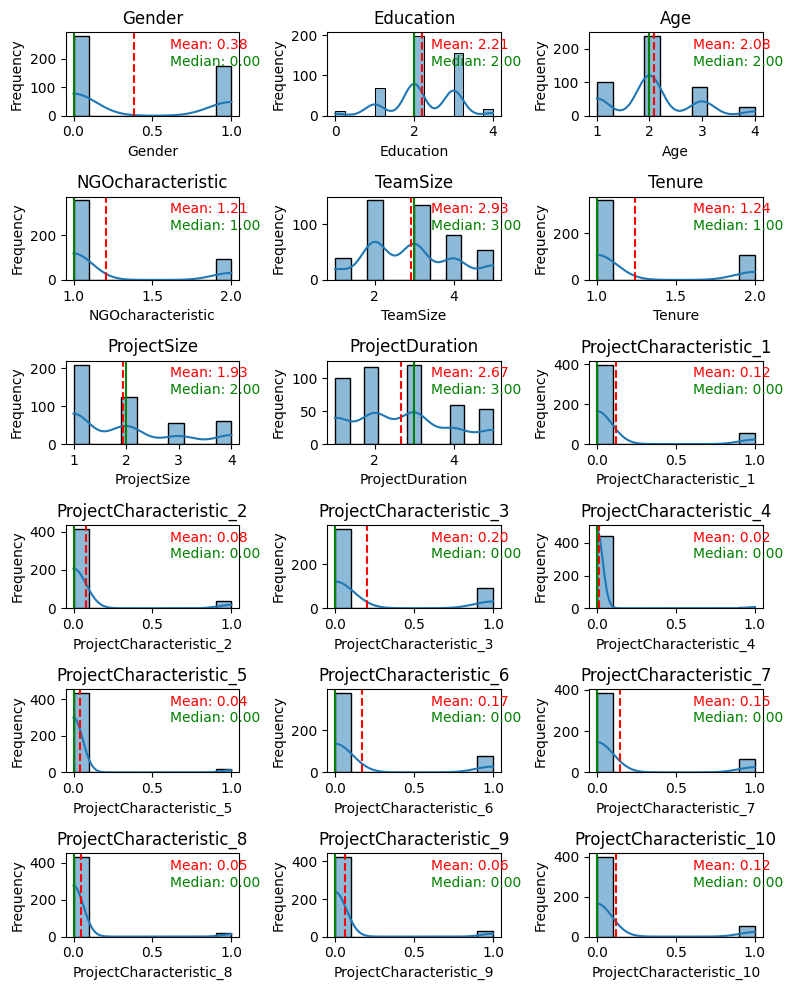

In [38]:
plot_distribution(clean_data,covariate, 6, 8, 10, 0.6, 'covariates')

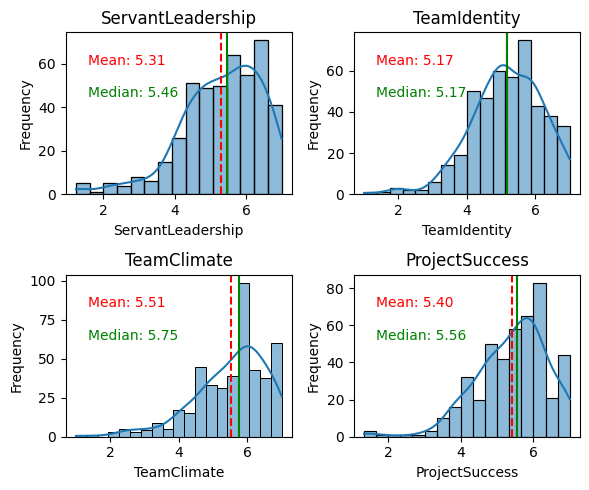

In [39]:
plot_distribution(clean_data,input_variable + ['ProjectSuccess'], 2, 6,5,0.1,'input_outcomes')

# Data Pre-Processing
Data: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/CHJHL5

In [21]:
clean_data.shape

(451, 22)

In [22]:
def data_add_indicator(data, percentile = 0.5):
  servant_leadership_50_percentile = data['ServantLeadership'].quantile(percentile)
  print(servant_leadership_50_percentile)
  # Create a new column based on whether 'ServantLeadership' is above or below the 50th percentile
  data['ServantLeadership_indicator'] = np.where(
      data['ServantLeadership'] >= servant_leadership_50_percentile, 1, 0
  )
  return data

In [23]:
def data_add_indicator_two_side(data):
    servant_leadership_lower_percentile = data['ServantLeadership'].quantile(0.33)
    servant_leadership_upper_percentile = data['ServantLeadership'].quantile(0.66)
    print(servant_leadership_lower_percentile, servant_leadership_upper_percentile)

    # Create a new column based on whether 'ServantLeadership' is below the 33rd percentile or above the 66th percentile
    data = data.loc[(data['ServantLeadership'] <= servant_leadership_lower_percentile) |
        (data['ServantLeadership'] >= servant_leadership_upper_percentile)]

    data['ServantLeadership_indicator'] = np.where(
        data['ServantLeadership'] >= servant_leadership_upper_percentile,
        1, 0
    )
    return data

In [24]:
# clean_data_05 = data_add_indicator_two_side(clean_data.copy())
choice = 0.50#'two_side'
clean_data_05 = data_add_indicator(clean_data.copy(), choice)
# 4.923076923076923 5.923076923076923 -> two side
# 5.076923076923077 -> 40%
# 5.461538461538462 -> 50%
# 5.6923076923076925 -> 60%
# 6.0 -> 70%

5.461538461538462


In [25]:
clean_data_05.shape

(451, 23)

<Axes: xlabel='ServantLeadership_indicator', ylabel='Count'>

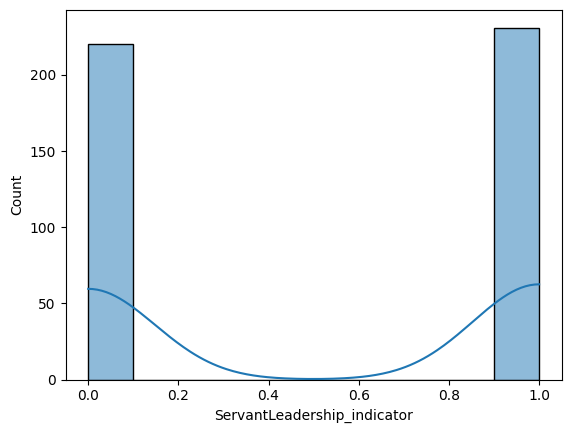

In [26]:
sns.histplot(clean_data_05['ServantLeadership_indicator'], kde=True)

## 2.0 DAG Analysis for raw projects [Hidden]

In [ ]:
#!pip install pgmpy
from pgmpy.estimators import HillClimbSearch, BicScore
est = HillClimbSearch(clean_data_05)
best_model = est.estimate(scoring_method=BicScore(clean_data_05))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
def showBN(model, save =False):
    from graphviz import Digraph
    node_attr= dict(
    stype = 'filled',
    shape='box',
    align = 'left',
    fontsize='12',
    ranksep='0.1',
    height = '0.2',
    )
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size='12,12'))
    seen = set()
    edges = model.edges()
    for a,b in edges:
        dot.edge(a,b)
    if save:
        dot.view(cleanup=True)
    return dot

In [ ]:
def bayesian_network(data = clean_data_05, indegree = 2):
  # Define the structure learning algorithm (Hill Climbing with K2Score)
  hc = HillClimbSearch(data)
  # Find the best model
  best_model = hc.estimate(scoring_method=K2Score(data),max_indegree=indegree)
  # Visualize the network
  return showBN(best_model)

  0%|          | 0/1000000 [00:00<?, ?it/s]

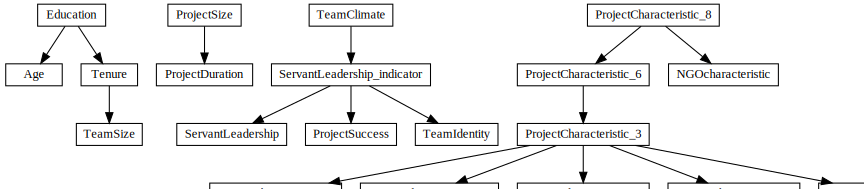

In [ ]:
bayesian_network(clean_data_05, 1)

  0%|          | 0/1000000 [00:00<?, ?it/s]

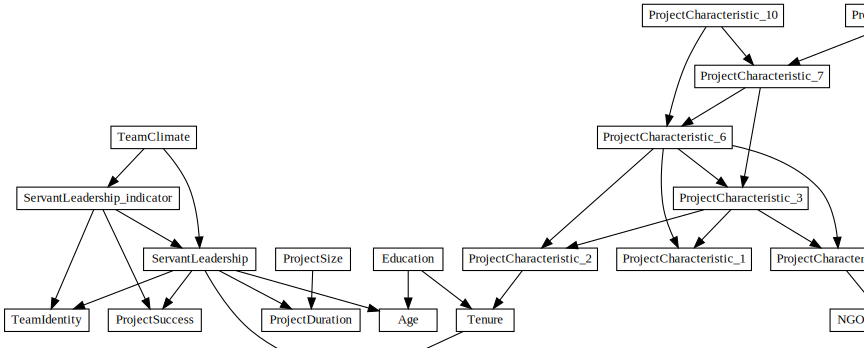

In [ ]:
bayesian_network(clean_data_05, 2)

  0%|          | 0/1000000 [00:00<?, ?it/s]

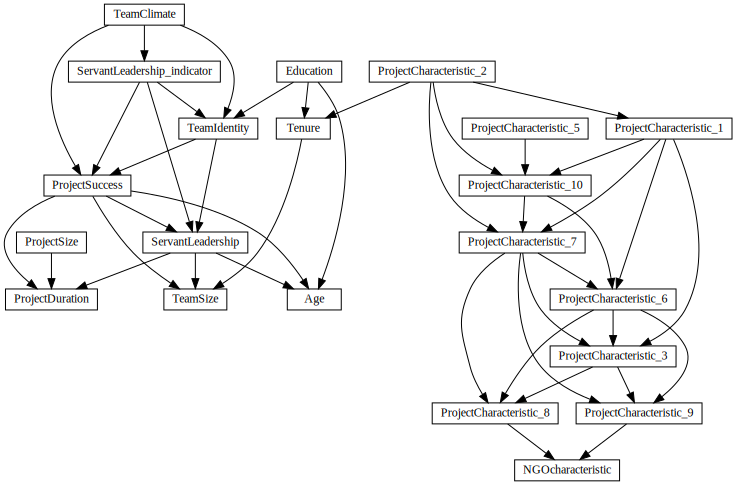

In [ ]:
bayesian_network(clean_data_05, 3)

# 3.  unobserved confounders
in the relationship between ServantLeadership_indicator (as the treatment effect) and Project_Success_mean (as the outcome).

## 3.1 Propensity Score Matching (PSM).

1. Calculate Propensity Scores: Estimate the propensity scores based on the ServantLeadership_indicator using logistic regression, including other variables as covariates to control for confounders.
2. Matching: Match the projects with similar propensity scores.
3. Analysis Post-Matching: Compare the project success mean (Project_Success_mean) between the matched groups.

In [27]:
def propensity_score(propensity_data):
  # Preparing the data for propensity score calculation
  X = propensity_data.drop(['ServantLeadership_indicator'], axis=1)
  y = propensity_data['ServantLeadership_indicator']

  # Split the data into training and testing sets
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)

  # Logistic regression model for propensity score
  log_reg = LogisticRegression()
  # log_reg.fit(X_train, y_train)
  log_reg.fit(X, y)

  # Predicting and evaluating the model
  # y_pred = log_reg.predict(X_test)
  # report = classification_report(y_test, y_pred)
  # print(report)
  # Calculating propensity scores for the entire dataset
  propensity_scores = log_reg.predict_proba(X)[:, 1]  # Probability of being in the treatment group
  return propensity_scores

In [28]:
propensity_data = clean_data_05.copy().drop(input_variable + ['ProjectSuccess'], axis = 1)
propensity_data.columns

Index(['Gender', 'Education', 'Age', 'NGOcharacteristic', 'TeamSize', 'Tenure', 'ProjectSize', 'ProjectDuration', 'ProjectCharacteristic_1', 'ProjectCharacteristic_2', 'ProjectCharacteristic_3', 'ProjectCharacteristic_4', 'ProjectCharacteristic_5', 'ProjectCharacteristic_6', 'ProjectCharacteristic_7', 'ProjectCharacteristic_8', 'ProjectCharacteristic_9', 'ProjectCharacteristic_10', 'ServantLeadership_indicator'], dtype='object')

In [29]:
clean_data_05['propensity_score'] = propensity_score(propensity_data)

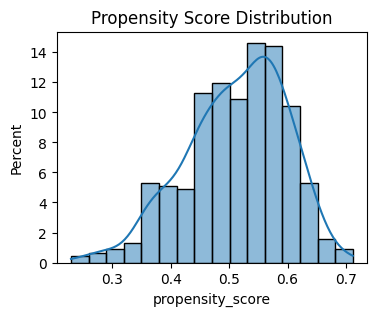

In [30]:
name = str(choice*100) if not isinstance(choice, str) else choice
plt.figure(figsize = (4,3))
sns.histplot(clean_data_05['propensity_score'],kde=True, stat = 'percent')
plt.title("Propensity Score Distribution")
plt.savefig(f"gdrive/Shareddrives/stats_209/figs/p_score_{name}.png")
plt.show()

## 3.2 Propensity Score Stratification
Split the p score into 5 interval equivalently by percentile, and run SRE for each of them

In [31]:
data = clean_data_05.copy()
# Step 1: Discretize the propensity scores into 5 strata
data['strata'] = pd.qcut(data['propensity_score'], q=5, labels=False, duplicates='drop')

# Step 2 and 3: Calculate ATE within each stratum
strata_ate = data.groupby('strata').apply(lambda df: df[df['ServantLeadership_indicator'] == 1]['ProjectSuccess'].mean() - df[df['ServantLeadership_indicator'] == 0]['ProjectSuccess'].mean())

# Step 4: Combine ATE estimates from all strata
# Weigh each stratum's ATE by the stratum's size to get the overall ATE
stratum_sizes = data['strata'].value_counts(normalize=True)
overall_ate = (strata_ate * stratum_sizes).sum()

print(f"Stratified ATE: {overall_ate}")
# Stratified ATE: 1.441936507936508 -> two side
# Stratified ATE: 1.1960164164131177 -> 40%
# Stratified ATE: 1.1511783050199638 ->  50%
# Stratified ATE: 1.1211998180063574 -> 60%
# Stratified ATE: 1.0502877836116775 -> 70%


Stratified ATE: 1.1511783050199638


## 3.3 Matched Observational Studies
1. Pair Matching: Ensure that each unit in the treatment group (projects with servant leadership) is matched with a corresponding unit in the control group (projects without servant leadership) based on the closest propensity score.
2. Covariate Balance Check: Assess the balance of key covariates between the treatment and control groups in the matched pairs. This step has already been visualized through box plots.
3. Outcome Analysis: Compare the outcomes (Project_Success_mean) between the treatment and control groups within these matched pairs.
4. Statistical Testing: Conduct statistical tests to determine if the differences in outcomes between the treatment and control groups are statistically significant.

In [32]:
data = clean_data_05.copy()
# Initialize the matcher with a caliper and the maximum number of matches for each control unit
matcher = NearestNeighborMatch(replace=False, ratio=2, random_state=42, caliper=0.05)
# Perform the matching
matched_data = matcher.match(data=clean_data_05, treatment_col='ServantLeadership_indicator', score_cols=['propensity_score'])
# The matched DataFrame will contain only the pairs that have been matched according to the specified criteria
matched_data.shape

# (232, 24) -> two side
# (282, 24) -> 40%
# (340, 24) -> 50%
# (348, 24) -> 60%
# (282, 24) -> 70%

NameError: ignored

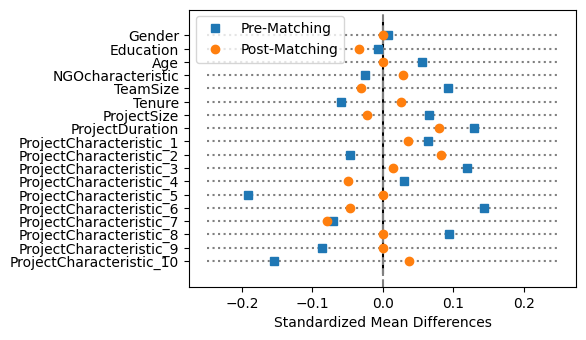

In [49]:
from scipy.stats import sem

def plot_standardized_differences(pre_matched_data, matched_data, covariate_columns, treatment_col, name = '50'):
    # Calculate standardized mean differences
    def std_mean_difference(group1, group2, covariate):
        diff = group1[covariate].mean() - group2[covariate].mean()
        pooled_std = np.sqrt((group1[covariate].std()**2 + group2[covariate].std()**2) / 2)
        return diff / pooled_std

    # Calculate 95% confidence interval
    def confidence_interval(group1, group2, covariate):
        std_error = sem(group1[covariate]) + sem(group2[covariate])
        return 1.96 * std_error

    pre_matched_treatment = pre_matched_data[pre_matched_data[treatment_col] == 1]
    pre_matched_control = pre_matched_data[pre_matched_data[treatment_col] == 0]

    matched_treatment = matched_data[matched_data[treatment_col] == 1]
    matched_control = matched_data[matched_data[treatment_col] == 0]

    smd_pre = [std_mean_difference(pre_matched_treatment, pre_matched_control, cov) for cov in covariate_columns]
    smd_post = [std_mean_difference(matched_treatment, matched_control, cov) for cov in covariate_columns]
    ci_pre = [confidence_interval(pre_matched_treatment, pre_matched_control, cov) for cov in covariate_columns]
    ci_post = [confidence_interval(matched_treatment, matched_control, cov) for cov in covariate_columns]

    # Plotting
    fig, ax = plt.subplots(figsize=(5, len(covariate_columns) * 0.2))
    ax.errorbar(smd_pre, range(len(smd_pre)), fmt='s', label='Pre-Matching')
    ax.errorbar(smd_post, range(len(smd_post)), fmt='o', label='Post-Matching')
    ax.hlines(range(len(smd_pre)), xmin=-.25, xmax=.25, color='gray', linestyles='dotted')
    ax.vlines(0, ymin=-1, ymax=len(smd_pre), colors='black', linestyles='solid')

    ax.set_yticks(range(len(covariate_columns)))
    ax.set_yticklabels(covariate_columns)
    ax.set_xlabel('Standardized Mean Differences')
    ax.invert_yaxis()  # To match the R xBalance plot
    ax.axvline(x=0, color='grey', linestyle='--')
    ax.legend()
    plt.savefig(f"gdrive/Shareddrives/stats_209/figs/variance_matching_{name}.png")
    plt.show()


plot_standardized_differences(clean_data_05, matched_data, covariate_columns=covariate, treatment_col='ServantLeadership_indicator', name = name)


In [50]:
# Assume 'matched' is the DataFrame containing matched pairs and 'outcome' is the column with the outcome variable

# Separate the treatment and control groups within the matched pairs
treatment_outcomes = matched_data[matched_data['ServantLeadership_indicator'] == 1]['ProjectSuccess']
control_outcomes = matched_data[matched_data['ServantLeadership_indicator'] == 0]['ProjectSuccess']

# Calculate the differences in outcomes for the matched pairs
differences = treatment_outcomes.values - control_outcomes.values

# Estimate the ATT by averaging the differences
att = differences.mean()

# Perform a t-test to test if the ATT is significantly different from zero
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(treatment_outcomes, control_outcomes)

print(f'Estimated ATT: {att}')
print(f't-statistic: {t_stat}, p-value: {p_value}')

# two-side
# Estimated ATT: 1.4837164750957852
# t-statistic: 12.530192321801755, p-value: 3.0845280944085825e-23

# 40%
# Estimated ATT: 1.1048069345941687
# t-statistic: 10.470649294339106, p-value: 2.6338865502902833e-19

# 50%
# Estimated ATT: 1.1411764705882352
# t-statistic: 12.311703345753441, p-value: 2.8329481686666403e-25

# 60
# Estimated ATT: 1.194125159642401
# t-statistic: 13.537032690328838, p-value: 6.14314606349966e-29

# 70%
# Estimated ATT: 0.9826635145784081
# t-statistic: 9.894577532064433, p-value: 7.90030516182276e-18


Estimated ATT: 1.1411764705882352
t-statistic: 12.311703345753441, p-value: 2.8329481686666403e-25


Next step: analyze the Project_Success_mean between these matched groups to see if there are significant differences in project success attributable to the treatment effect (ServantLeadership_indicator). Let's proceed with this analysis

In [51]:
# # Analysis of the Project Success Mean between matched groups
# model = smf.ols('ProjectSuccess ~ ServantLeadership_indicator', data=matched_data)
# result = model.fit()

# # Summary of the regression analysis
# result.summary()


The positive and significant coefficient of ServantLeadership_indicator indicates that servant leadership has a favorable impact on project success. However, the modest effect size and low R-squared value imply that other factors, possibly unobserved, also play a significant role in determining project success.

# 4. Mediating effects of TeamIdentity and TeamClimate in the relationship between ServantLeadership and Project_Success


In [52]:
# cols = ['Gender', 'Education', 'Age', 'NGOcharacteristic', 'TeamSize', 'Tenure', 'ProjectSize', 'ProjectDuration', 'ProjectCharacteristic_1', 'ProjectCharacteristic_2', 'ProjectCharacteristic_3', 'ProjectCharacteristic_4', 'ProjectCharacteristic_5', 'ProjectCharacteristic_6', 'ProjectCharacteristic_7', 'ProjectCharacteristic_8', 'ProjectCharacteristic_9', 'ProjectCharacteristic_10']
# '+'.join(cols)

In [53]:
# Modeling the Mediators
treatment = 'ServantLeadership_indicator'#ServantLeadership_indicator
other_covariate = 'Gender+Education+Age+NGOcharacteristic+TeamSize+Tenure+ProjectSize+ProjectDuration+ProjectCharacteristic_1+ProjectCharacteristic_2+ProjectCharacteristic_3+ProjectCharacteristic_4+ProjectCharacteristic_5+ProjectCharacteristic_6+ProjectCharacteristic_7+ProjectCharacteristic_8+ProjectCharacteristic_9+ProjectCharacteristic_10'
model_team_identity = smf.ols(f'TeamIdentity ~ {treatment}', data=matched_data).fit()
model_team_climate = smf.ols(f'TeamClimate ~ {treatment} ', data=matched_data).fit()

model_PS_team_identity = smf.ols(f'ProjectSuccess ~ {treatment} + TeamIdentity + {other_covariate}', data=matched_data).fit()
model_PS_team_climate = smf.ols(f'ProjectSuccess ~ {treatment} + TeamClimate + {other_covariate}', data=matched_data).fit()

#indirect
indirect_effect_identity = model_team_identity.params[treatment] * model_PS_team_identity.params['TeamIdentity']
indirect_effect_climate = model_team_climate.params[treatment] * model_PS_team_climate.params['TeamClimate']

# Direct Effect
# The direct effect is the effect of the treatment on the outcome, not through the mediator
direct_effect_through_identity = model_PS_team_identity.params[treatment]
direct_effect_through_climate = model_PS_team_climate.params[treatment]

In [54]:
indirect_effect_identity, direct_effect_through_identity
#(0.5350601980727813, 0.9453665648604032) - two side
# (0.47155662818567623, 0.6537376283929569) - 40%
#(0.4570837443120876, 0.6706312724967354) - 50%
# (0.5383168871207801, 0.653538536833219) - 60%
# (0.4602924672004007, 0.5312958011663147) - 70%

(0.4570837443120876, 0.6706312724967354)

In [55]:
indirect_effect_climate,direct_effect_through_climate
#(1.0344336953886508, 0.44093614068484444) - two side
# (0.6740887000210749, 0.44309851103748554) 40%
#(0.6893307716918328, 0.44191642715305324) : 50%
# (0.8194284981934882, 0.37141408930255576) 60%
# (0.7322262573323545, 0.2641304869389627) 70%

(0.6893307716918328, 0.44191642715305324)